In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Import: Check and Conversions
- In this first secion I will import the data, check to make sure it looks correct (correctly formatted etc.) and find the columns I need to complete the challenge
- I will also need convert the time from UNIX time to a python-friendly datetime format

In [3]:
# Function to show all rows when examining raw data
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [4]:
# Reading the raw training data set from Kaggle and checking if the read was successful
ctrRaw_df = pd.read_csv('rawCtrData.csv')
ctrRaw_df.shape

(40428967, 24)

In [5]:
# Display read in data to check if it looks ok
display_all(ctrRaw_df.head().T)

,0,1,2,3,4
id,1000009418151094272.0,10000169349117863936.0,10000371904215119872.0,10000640724480837632.0,10000679056417042432.0
click,0,0,0,0,0
hour,14102100,14102100,14102100,14102100,14102100
C1,1005,1005,1005,1005,1005
banner_pos,0,0,0,0,1
site_id,1fbe01fe,1fbe01fe,1fbe01fe,1fbe01fe,fe8cc448
site_domain,f3845767,f3845767,f3845767,f3845767,9166c161
site_category,28905ebd,28905ebd,28905ebd,28905ebd,0569f928
app_id,ecad2386,ecad2386,ecad2386,ecad2386,ecad2386
app_domain,7801e8d9,7801e8d9,7801e8d9,7801e8d9,7801e8d9


In [6]:
# Checking data types particularly the hour column as it needs to be converted
ctrRaw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40428967 entries, 0 to 40428966
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                float64
 1   click             int64  
 2   hour              int64  
 3   C1                int64  
 4   banner_pos        int64  
 5   site_id           object 
 6   site_domain       object 
 7   site_category     object 
 8   app_id            object 
 9   app_domain        object 
 10  app_category      object 
 11  device_id         object 
 12  device_ip         object 
 13  device_model      object 
 14  device_type       int64  
 15  device_conn_type  int64  
 16  C14               int64  
 17  C15               int64  
 18  C16               int64  
 19  C17               int64  
 20  C18               int64  
 21  C19               int64  
 22  C20               int64  
 23  C21               int64  
dtypes: float64(1), int64(14), object(9)
memory usage: 7.2+ GB


In [7]:
# Dropping extra columns not needed for the analysis
ctrRaw_df = ctrRaw_df[['hour', 'click']]

In [8]:
# Convert 'hours' column from int64 Unix time format to datetime format (year-day-month-hour)
ctrRaw_df['hour'] = pd.to_datetime(ctrRaw_df['hour'], format='%y%m%d%H')
ctrRaw_df['hour']

0          2014-10-21 00:00:00
1          2014-10-21 00:00:00
2          2014-10-21 00:00:00
3          2014-10-21 00:00:00
4          2014-10-21 00:00:00
                   ...        
40428962   2014-10-30 23:00:00
40428963   2014-10-30 23:00:00
40428964   2014-10-30 23:00:00
40428965   2014-10-30 23:00:00
40428966   2014-10-30 23:00:00
Name: hour, Length: 40428967, dtype: datetime64[ns]

In [9]:
# df.resample('D', on='Date_Time').mean()
ctrRaw_df.resample('H', on='hour').agg({'click': ['count', 'sum']}).reset_index()

hour   click       
                          count    sum
0   2014-10-21 00:00:00  119006  20792
1   2014-10-21 01:00:00  137442  23873
2   2014-10-21 02:00:00  207471  31265
3   2014-10-21 03:00:00  193355  32830
4   2014-10-21 04:00:00  264711  40026
..                  ...     ...    ...
235 2014-10-30 19:00:00  134243  26046
236 2014-10-30 20:00:00  110764  20820
237 2014-10-30 21:00:00  112238  20958
238 2014-10-30 22:00:00  101250  17328
239 2014-10-30 23:00:00   83608  14116

[240 rows x 3 columns]

In [10]:
# Group the data by hours and count the number of impressions and total clicks that occurred
ctrClean_df = ctrRaw_df.groupby('hour').agg({'click': ['count', 'sum']}).reset_index()

# Rename the columns
ctrClean_df.columns = ['hour', 'impressions', 'totalClicks']

# Calculate the CTR
ctrClean_df['CTR'] = ctrClean_df['totalClicks']/ctrClean_df['impressions']

# Inspecting the grouping
ctrClean_df

,hour,impressions,totalClicks,CTR
0,2014-10-21 00:00:00,119006,20792,0.174714
1,2014-10-21 01:00:00,137442,23873,0.173695
2,2014-10-21 02:00:00,207471,31265,0.150696
3,2014-10-21 03:00:00,193355,32830,0.169791
4,2014-10-21 04:00:00,264711,40026,0.151206
...,...,...,...,...
235,2014-10-30 19:00:00,134243,26046,0.194021
236,2014-10-30 20:00:00,110764,20820,0.187967
237,2014-10-30 21:00:00,112238,20958,0.186728
238,2014-10-30 22:00:00,101250,17328,0.171141


In [11]:
# Save cleaned dataset
ctrClean_df.to_csv('ctrCleanData.csv')

### Notes on data conversion
NB: I am making two assumptions:
1. each row in the raw data represents an impression at a given time
2. click represents the number of clicks recorded during that impression

Text(0.5, 1.0, 'Hourly Click-Through Rate')

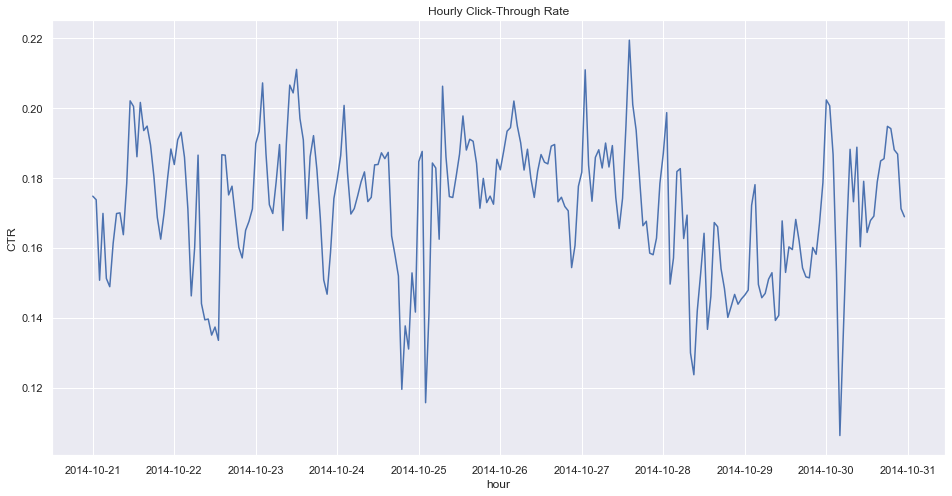

In [12]:
# Plotting converted data
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth": 2})
sns.set(rc={'figure.figsize':(16,8)})

sns.lineplot(data = ctrClean_df, x = 'hour', y = 'CTR')
plt.title('Hourly Click-Through Rate')

Note on the data:
- There appears to be seasonality (lower timescale/frequency fluxuation) that my be interesting to explore to see if there are daily or weekly trends that may emerge 
- There also seems to be variability on shorter time scales possibly reflecting high-traffic times of day
- Understanding these trends might give insight into what may lead to the detected outliers, and would also help with outlier prediction

## Finding outliers

Build a simple outlier detection algorithm based on a “moving average”. A data point is
identified as an outlier, if it is more than 1.5 standard deviations apart from its calculated moving
average (for simplicity’s sake, we will assume a Gaussian distribution here).
The outcome of this task is a plot, that highlights all found outliers.

In [13]:
# Writing a function to test different time window values

def find_outliers(ctrClean_df, time_window):

    # Calculating the rolling mean and standard deviation of click-through-rate
    ctrClean_df['meanCtr'] = ctrClean_df['CTR'].rolling(window=time_window).mean()
    ctrClean_df['stdCtr']  = ctrClean_df['CTR'].rolling(window=time_window).std()*1.5

    # Calculating the upper and lower bounds (adjusting for the standard devation of 1.5)
    ctrClean_df['stdCtr_upper'] = ctrClean_df['meanCtr'] + ctrClean_df['stdCtr']
    ctrClean_df['stdCtr_lower'] = ctrClean_df['meanCtr'] - ctrClean_df['stdCtr']

    # Calculating ourliers
    outliers  = ctrClean_df[(ctrClean_df['CTR'] > ctrClean_df['stdCtr_upper']) | 
                            (ctrClean_df['CTR'] < ctrClean_df['stdCtr_lower'])]

    print('Found', len(outliers), 'outliers')

In [14]:
# Trying out different timewindows and seeing how it effects the nubmer of outliers
find_outliers(ctrClean_df, 6)
find_outliers(ctrClean_df, 12)
find_outliers(ctrClean_df, 18)
find_outliers(ctrClean_df, 24)
find_outliers(ctrClean_df, 30)
find_outliers(ctrClean_df, 36)
find_outliers(ctrClean_df, 42)
find_outliers(ctrClean_df, 48);

Found 35 outliers
Found 34 outliers
Found 40 outliers
Found 33 outliers
Found 36 outliers
Found 33 outliers
Found 32 outliers
Found 30 outliers


- Based on this crude analysis, and taking a conservative strategy (possibly detecting false positives), even though this is not a labeled data set, I have chosen to go with 18 hour time window
- Another step that could be taken is to remove the seasonality, but that said the moving average/confidence intervals would track these fluctuations 

In [15]:
# Calculating the rolling mean and standard deviation of click-through-rate
# Using a time window of 18 hours
time_window = 18

ctrClean_df['meanCtr'] = ctrClean_df['CTR'].rolling(window=time_window).mean()
ctrClean_df['stdCtr']  = ctrClean_df['CTR'].rolling(window=time_window).std()*1.5

# Calculating the upper and lower bounds (adjusting for the standard devation of 1.5)
ctrClean_df['stdCtr_upper'] = ctrClean_df['meanCtr'] + ctrClean_df['stdCtr']
ctrClean_df['stdCtr_lower'] = ctrClean_df['meanCtr'] - ctrClean_df['stdCtr']

# Calculating ourliers
outliers  = ctrClean_df[(ctrClean_df['CTR'] > ctrClean_df['stdCtr_upper']) | 
                        (ctrClean_df['CTR'] < ctrClean_df['stdCtr_lower'])]

print('Found', len(outliers), 'outliers')

Found 40 outliers


Text(0.5, 1.0, 'Hourly Click-Through Rate')

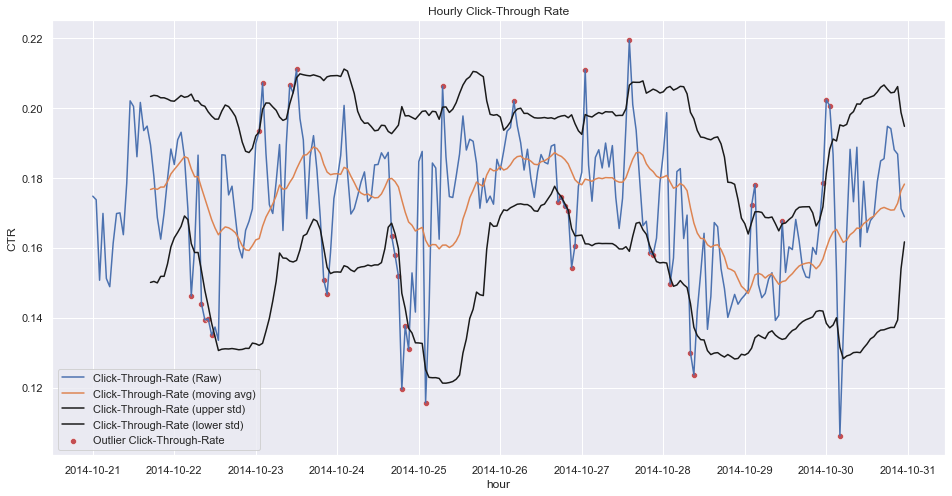

In [16]:
# Plotting converted data
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth": 2})
sns.set(rc={'figure.figsize':(16,8)})

sns.lineplot(data = ctrClean_df, x = 'hour', y = 'CTR')
sns.lineplot(data = ctrClean_df, x = 'hour', y = 'meanCtr')
sns.lineplot(data = ctrClean_df, x = 'hour', y = 'stdCtr_lower', color = 'k')
sns.lineplot(data = ctrClean_df, x = 'hour', y = 'stdCtr_upper', color = 'k')
sns.scatterplot(data = outliers, x = 'hour', y = 'CTR', color = 'r')

plt.legend(['Click-Through-Rate (Raw)', 
            'Click-Through-Rate (moving avg)',
           'Click-Through-Rate (upper std)',
           'Click-Through-Rate (lower std)',
           'Outlier Click-Through-Rate'])

plt.title('Hourly Click-Through Rate')